# Weryfikacja jak zmieniaja się oszacowania modeli na niezbilansowanym zbiorze danych pochodzącyzm z https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers wykorzystując techniki over, under, over-under sampling oraz wagi.

In [2]:
import pandas as pd 
import numpy as np

1️⃣ Załadowanie zbioru danych oraz przegląd nazw kolumn 🗂️

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('BankChurners.csv', sep = ',')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
list(df.columns)

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

2️⃣ Usunięcie kolumn, które w zaden sposob nie sa potrzebne w analizie ❌

In [5]:
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
del df['CLIENTNUM']

3️⃣ Weryfikacj typów zmiennych występujących w zbiorze danych 🔍

In [6]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [7]:
from scipy.stats import kurtosis, skew

4️⃣ Przygotowanie tabeli zawierającej wszystkie zmienne ciągłe i ich statystyk opisoych takich jak:

✅ Liczebność
✅ Średnia
✅ Błąd standardowy
✅ Wartość minimalna
✅ Pierwszy kwartyl
✅ Mediana
✅ Trzeci kwartyl
✅ Wartość maksymalna
✅ Kurtoza 
✅ Skośność

In [8]:
dfc=pd.DataFrame()
dfc=df.describe()

dfk=pd.DataFrame()
dfk['kurtosis']=df.kurtosis(numeric_only=True)
dfk=dfk.transpose()

dfs=pd.DataFrame()
dfs['skew']=df.skew(numeric_only=True)
dfs=dfs.transpose()

In [9]:
pd.concat([dfc, dfk, dfs])

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000
kurtosis,-0.288620,-0.683017,0.400100,-1.006131,1.098523,0.000863,1.808989,-1.145992,1.798617,9.993501,3.894023,-0.367163,15.689293,-0.794972
skew,-0.033605,-0.020826,-0.106565,-0.162452,0.633061,0.011006,1.666726,-0.148837,1.661697,1.732063,2.041003,0.153673,2.064031,0.718008


5️⃣ Weryfikacja czy zrbiór danych nie zawiera wartości pustych❗️

In [10]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
colors = sns.color_palette('Set3')

6️⃣ Tabela oraz wykrez przedstawiająca liczebność zmiennej 'Attrition_Flag', ktora określa relację klienta z bankiem 🤝

In [13]:
df1=pd.DataFrame()
a='Attrition_Flag'
df1['count']=df[a].value_counts()
df1['%']=round(df[a].value_counts()/df[a].count()*100,2)
df1

,count,%
Existing Customer,8500,83.93
Attrited Customer,1627,16.07


<AxesSubplot: ylabel='%'>

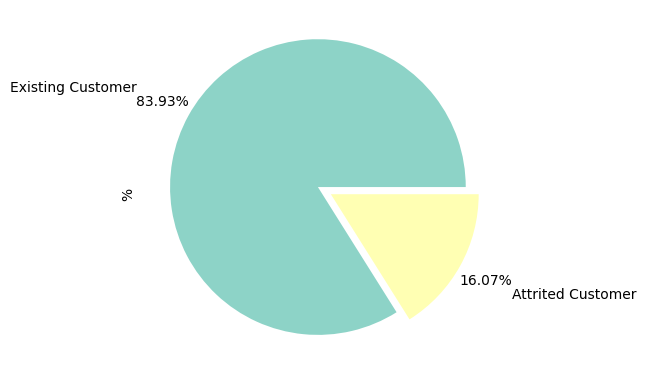

In [14]:
explode = (0.1, 0)
(df1['%']).plot(kind='pie', autopct='%1.2f%%', explode=explode,pctdistance=1.2, labeldistance=1.4, colors = colors )

7️⃣ Tabela oraz wykrez przedstawiająca liczebność zmiennej 'Gender', ktora określa płeć klientów w danej próbie 👩🏻‍🦰👨🏻‍🦰

In [15]:
df2=pd.DataFrame()
a='Gender'
df2['count']=df[a].value_counts()
df2['%']=round(df[a].value_counts()/df[a].count()*100,2)
df2

,count,%
F,5358,52.91
M,4769,47.09


<AxesSubplot: ylabel='%'>

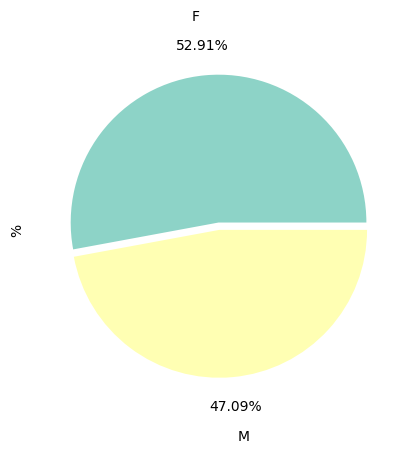

In [16]:
explode = (0.05, 0)
(df2['%']).plot(kind='pie', autopct='%1.2f%%', explode=explode, pctdistance=1.2, labeldistance=1.4, colors=colors)

8️⃣ Tabela oraz wykrez przedstawiająca liczebność zmiennej 'Education_Level', ktora określa poziom edukacji klientów w danej próbie 🧑‍🏫🏫

In [17]:
df3=pd.DataFrame()
a='Education_Level'
df3['count']=df[a].value_counts()
df3['%']=round(df[a].value_counts()/df[a].count()*100,2)
df3

,count,%
Graduate,3128,30.89
High School,2013,19.88
Unknown,1519,15.00
Uneducated,1487,14.68
College,1013,10.00
Post-Graduate,516,5.10
Doctorate,451,4.45


<AxesSubplot: ylabel='%'>

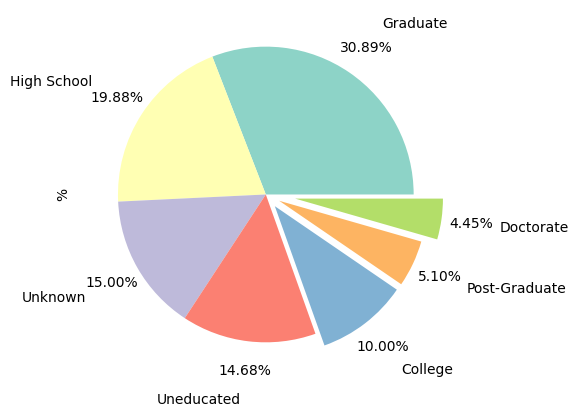

In [18]:
explode = (0, 0, 0, 0, 0.1, 0.1, 0.2)
(df3['%']).plot(kind='pie', autopct='%1.2f%%', explode=explode, pctdistance=1.2, labeldistance=1.4, colors=colors)

9️⃣ Tabela oraz wykrez przedstawiająca liczebność zmiennej 'Marital_Status', ktora określa stan cywilny klientów w danej próbie 👰🏼‍♀️🤵🏻‍♂️

In [19]:
df4=pd.DataFrame()
a='Marital_Status'
df4['count']=df[a].value_counts()
df4['%']=round(df[a].value_counts()/df[a].count()*100,2)
df4

,count,%
Married,4687,46.28
Single,3943,38.94
Unknown,749,7.40
Divorced,748,7.39


<AxesSubplot: ylabel='%'>

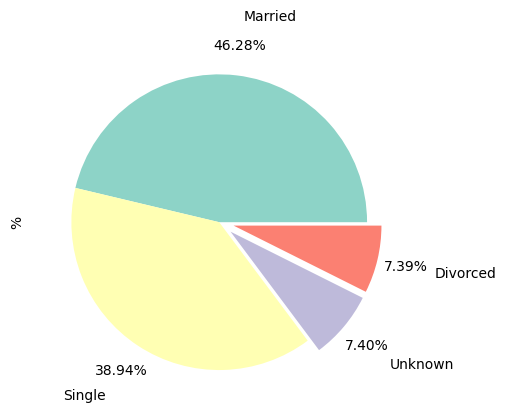

In [20]:
explode = (0, 0, 0.1, 0.1)
(df4['%']).plot(kind='pie', autopct='%1.2f%%', explode=explode, pctdistance=1.2, labeldistance=1.4, colors=colors)

1️⃣0️⃣ Tabela oraz wykrez przedstawiająca liczebność zmiennej 'Income_Category', ktora określa przedział zarobków klientów w danej próbie💰🤑

In [21]:
df5=pd.DataFrame()
a='Income_Category'
df5['count']=df[a].value_counts()
df5['%']=round(df[a].value_counts()/df[a].count()*100,2)
df5

,count,%
Less than $40K,3561,35.16
$40K - $60K,1790,17.68
$80K - $120K,1535,15.16
$60K - $80K,1402,13.84
Unknown,1112,10.98
$120K +,727,7.18


<AxesSubplot: ylabel='%'>

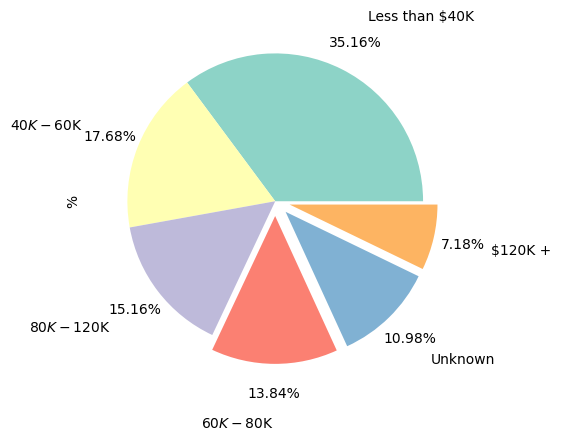

In [22]:
explode = (0, 0, 0, 0.1, 0.1, 0.1)
(df5['%']).plot(kind='pie', autopct='%1.2f%%', explode=explode, pctdistance=1.2, labeldistance=1.4, colors=colors)

1️⃣1️⃣ Tabela oraz wykrez przedstawiająca liczebność zmiennej 'Card_Category', ktora określa rodzaj karty który posiada klient 💳✒️

In [23]:
df6=pd.DataFrame()
a='Card_Category'
df6['count']=df[a].value_counts()
df6['%']=round(df[a].value_counts()/df[a].count()*100,2)
df6

,count,%
Blue,9436,93.18
Silver,555,5.48
Gold,116,1.15
Platinum,20,0.20


<AxesSubplot: ylabel='%'>

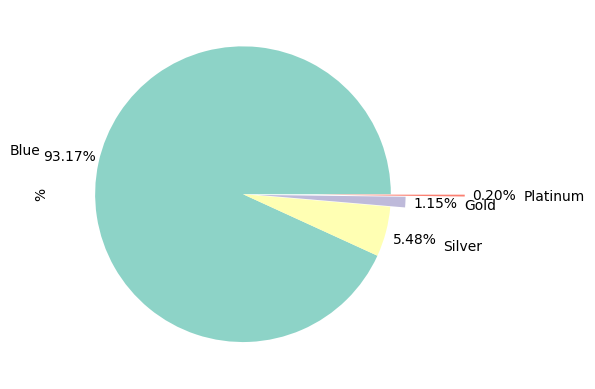

In [24]:
explode = (0, 0, 0.1, 0.5)
(df6['%']).plot(kind='pie', autopct='%1.2f%%', explode=explode, pctdistance=1.2, labeldistance=1.4, colors=colors)

1️⃣2️⃣ Porównanie wieku klientów i relacji z bankiem z podziałem na płeć

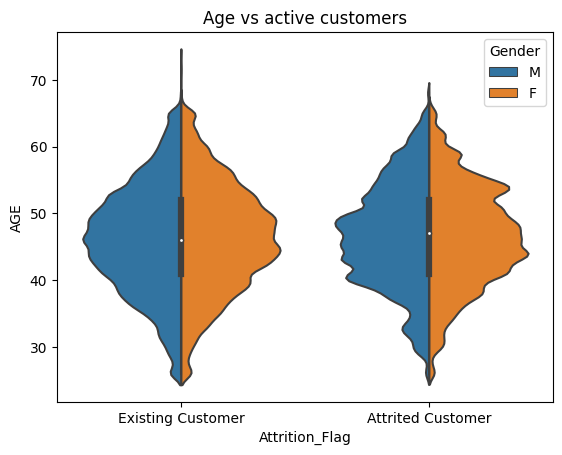

In [25]:
sns.violinplot(x='Attrition_Flag', y='Customer_Age', hue='Gender', data=df, split=True, bw=0.1)
plt.ylabel('AGE')
plt.title('Age vs active customers')
plt.show()

1️⃣3️⃣ Porównanie limitu kredytowego i relacji z bankiem z podziałem na płeć

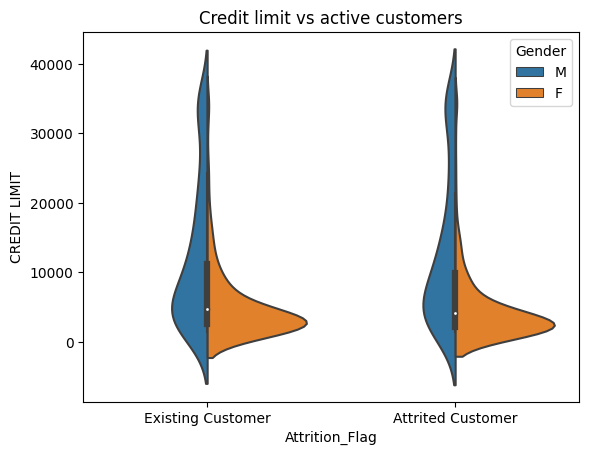

In [26]:
sns.violinplot(x='Attrition_Flag', y='Credit_Limit', hue='Gender', data=df, split=True, bw=0.35)
plt.ylabel('CREDIT LIMIT')
plt.title('Credit limit vs active customers')
plt.show()

1️⃣4️⃣ Porównanie okresu relacji z bankiem i relacji z bankiem z podziałem na płeć

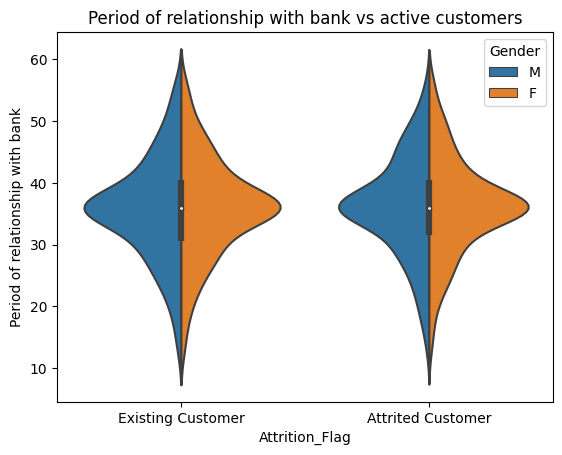

In [27]:
sns.violinplot(x='Attrition_Flag', y='Months_on_book', hue='Gender', data=df, split=True, bw=0.35)
plt.ylabel('Period of relationship with bank')
plt.title('Period of relationship with bank vs active customers')
plt.show()

1️⃣5️⃣ Porównanie liczby kontaktów z bankiem w ciagu 12 miesiecy i relacji z bankiem z podziałem na płeć

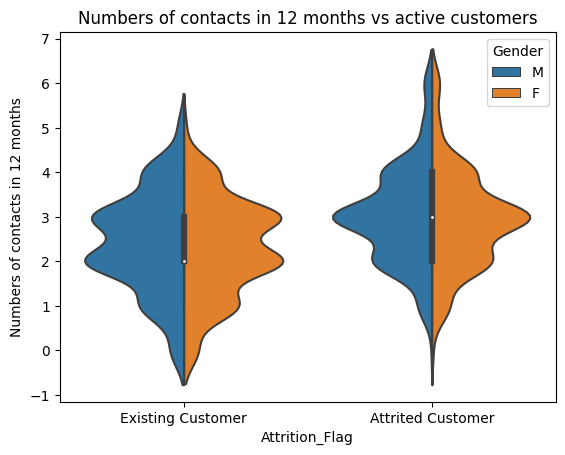

In [28]:
sns.violinplot(x='Attrition_Flag', y='Contacts_Count_12_mon', hue='Gender', data=df, split=True, bw=0.35)
plt.ylabel('Numbers of contacts in 12 months')
plt.title('Numbers of contacts in 12 months vs active customers')
plt.show()

1️⃣6️⃣ Porównanie liczby miesiecy w ktorych klienci byli nie aktywni i relacji z bankiem z podziałem na płeć

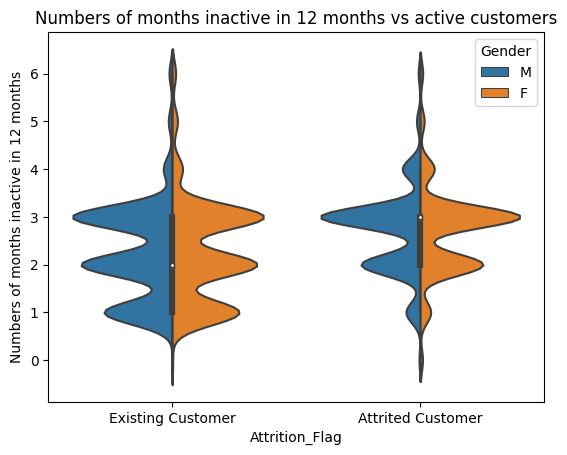

In [29]:
sns.violinplot(x='Attrition_Flag', y='Months_Inactive_12_mon', hue='Gender', data=df, split=True, bw=0.25)
plt.ylabel('Numbers of months inactive in 12 months')
plt.title('Numbers of months inactive in 12 months vs active customers')
plt.show()

1️⃣7️⃣ Przygotowanie macierzy korelacji w celu weryfikacji ktore zmienne odznaczaja sie wysoką korelacja 🔁

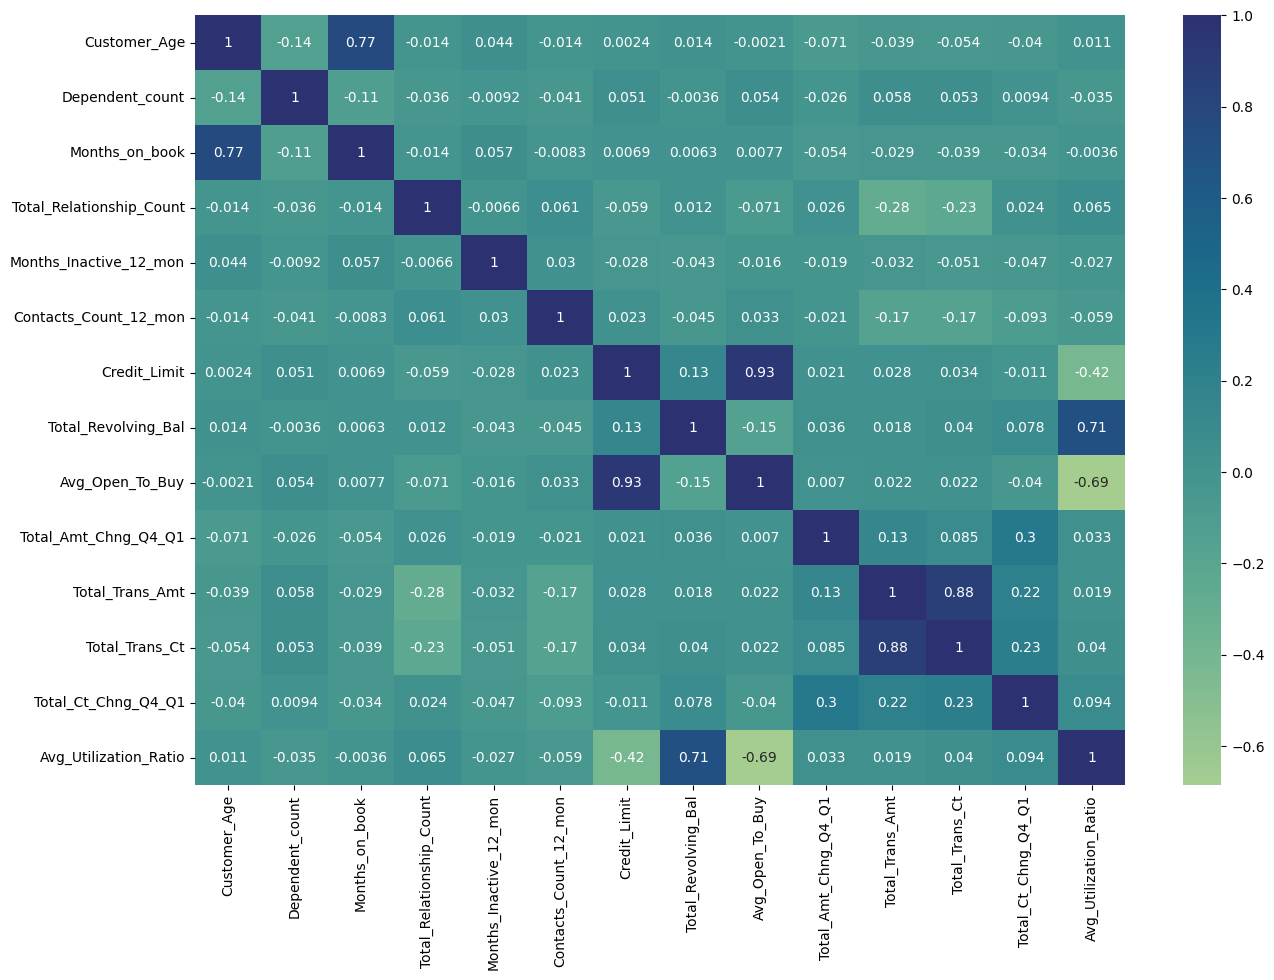

In [30]:
fig, ax = plt.subplots(figsize=(15,10))
plt.rcParams.update({'font.size': 10})
sns.heatmap(df.corr(method = 'spearman'), annot = True, cmap='crest', ax=ax)
plt.show()

2️⃣1️⃣ Rozgrupowanie zmiennych dyskretnych na poziomy 0 oraz 1

In [31]:
df= pd.get_dummies(df, columns=['Attrition_Flag'])
del df['Attrition_Flag_Existing Customer']

In [32]:
df = pd.get_dummies(df, drop_first=True)

In [33]:
df

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Attrited Customer,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


2️⃣2️⃣ Przygotowanie bibliotek do modeli regresji logistycznej

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import roc_curve, auc, classification_report, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

2️⃣3️⃣ Jak techniki oversampling, undersampling, over-undersampling oraz wagi wpływaja na oszacowania modeli

In [35]:
adysyn = ADASYN()
scaler = StandardScaler()
rus = RandomUnderSampler()
smt = SMOTETomek()
reg = LogisticRegression()

2️⃣4️⃣ funkcja do rysowania krzywej ROC

In [36]:
def plot_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

2️⃣5️⃣ Funkcja do walidacji krzyzowej

In [37]:
def crossVAL(model, X_train, y_train, n_splits):
    cv = cross_validate(model, X_train, y_train, scoring="roc_auc", return_train_score=True, cv=StratifiedKFold(shuffle=True, n_splits=n_splits))
    fold_scores=[]
    for fold in range(n_splits):
        train_score = cv['train_score'][fold]
        test_score = cv['test_score'][fold]
        score_diff = train_score - test_score
        fold_scores.append({
            'fold': fold + 1,
            'train_score': train_score*100,
            'test_score': test_score*100,
            'score_diff': score_diff*100
        })
    df = pd.DataFrame(fold_scores)
    return df

2️⃣6️⃣ Ustalenie targetu i zmiennych

In [38]:
X, y = df.drop(columns=["Attrition_Flag_Attrited Customer"]), df["Attrition_Flag_Attrited Customer"]

2️⃣7️⃣ Podział na zbiory treningowy i testowy

In [39]:
X_trainx, X_testx, y_trainx, y_testx = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

2️⃣8️⃣ Skalowanie danych

In [40]:
X_trainx = scaler.fit_transform(X_trainx)
X_testx = scaler.transform(X_testx)

2️⃣9️⃣ Model bez ingerencji w dane

In [41]:
modelx = reg.fit(X_trainx, y_trainx)

3️⃣0️⃣ Dokładność modelu

In [42]:
scorex=modelx.score(X_testx,y_testx)
print("Accuracy: %.2f%%" % (scorex * 100))

Accuracy: 89.98%


In [43]:
y_predx = modelx.predict_proba(X_testx)[:,1]

3️⃣1️⃣ Raport wyników

In [44]:
print(classification_report(y_testx, modelx.predict(X_testx)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1701
           1       0.77      0.54      0.63       325

    accuracy                           0.90      2026
   macro avg       0.84      0.75      0.79      2026
weighted avg       0.89      0.90      0.89      2026



3️⃣2️⃣ Krzywa ROC

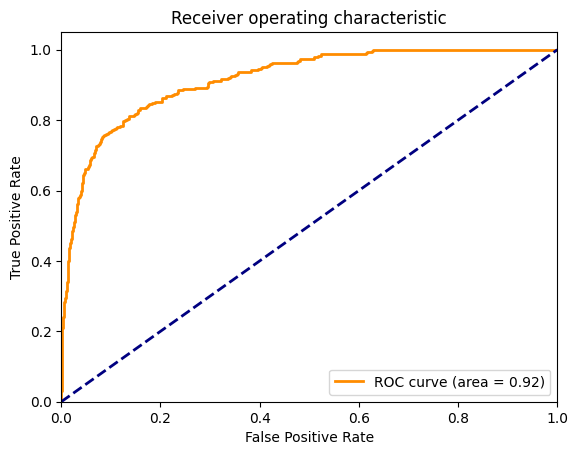

In [45]:
plot_roc_curve(y_testx, y_predx)

3️⃣3️⃣ Walidacja krzyzowa modelu

In [46]:
crossVAL(modelx, X_trainx, y_trainx,10)

,fold,train_score,test_score,score_diff
0,1,92.925718,90.551190,2.374528
1,2,92.854280,91.882353,0.971927
2,3,92.529842,94.936652,-2.406810
3,4,92.597736,94.124434,-1.526698
4,5,92.944053,91.015837,1.928216
5,6,92.745962,92.471719,0.274243
6,7,92.721309,93.061086,-0.339777
7,8,92.848284,91.721719,1.126565
8,9,92.812253,92.127828,0.684425
9,10,92.705790,93.245568,-0.539777


3️⃣4️⃣ Model z danymi oversampling

3️⃣5️⃣ Podział dnaych na treningowe i testowe

In [47]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

3️⃣6️⃣ Oversampling

In [48]:
X_train1, y_train1 = adysyn.fit_resample(X_train1,y_train1)

3️⃣7️⃣ Skalowanie danych

In [49]:
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

3️⃣8️⃣ Model z danymi dodanymi sztucznie

In [50]:
model1 = reg.fit(X_train1, y_train1)

3️⃣9️⃣ Dokładność modelu

In [51]:
score1=model1.score(X_test1,y_test1)
print("Accuracy: %.2f%%" % (score1 * 100))

Accuracy: 88.25%


In [52]:
y_pred1 = model1.predict_proba(X_test1)[:,1]

4️⃣0️⃣ Raport wyników

In [53]:
print(classification_report(y_test1, model1.predict(X_test1)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1701
           1       0.64      0.61      0.63       325

    accuracy                           0.88      2026
   macro avg       0.78      0.77      0.78      2026
weighted avg       0.88      0.88      0.88      2026



4️⃣1️⃣ Krzywa ROC

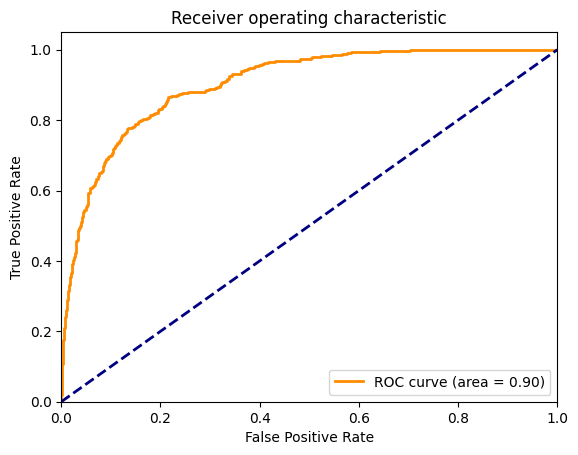

In [54]:
plot_roc_curve(y_test1, y_pred1)

4️⃣2️⃣ Walidacja krzyzowa

In [55]:
crossVAL(model1, X_train1, y_train1, 10)

,fold,train_score,test_score,score_diff
0,1,97.648129,97.112299,0.535829
1,2,97.621854,97.370554,0.251300
2,3,97.545915,98.036669,-0.490755
3,4,97.679556,96.814362,0.865194
4,5,97.569907,97.921229,-0.351322
5,6,97.636220,97.326203,0.310017
6,7,97.614131,97.447161,0.166970
7,8,97.611817,97.488541,0.123276
8,9,97.576229,97.790930,-0.214701
9,10,97.553600,98.020814,-0.467214


4️⃣3️⃣ Model z danymi undersampling

4️⃣4️⃣ Podział dnaych na treningowe i testowe

In [56]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

4️⃣5️⃣ Undersampling

In [57]:
X_train2, y_train2 = rus.fit_resample(X_train2,y_train2)

4️⃣6️⃣ Skalowanie danych

In [58]:
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

4️⃣7️⃣ Model z danymi usuniętymi

In [59]:
model2 = reg.fit(X_train2, y_train2)

4️⃣8️⃣ Dokładność modelu

In [60]:
score2=model2.score(X_test2,y_test2)
print("Accuracy: %.2f%%" % (score2 * 100))

Accuracy: 85.00%


In [61]:
y_pred2 = model2.predict_proba(X_test2)[:,1]

4️⃣9️⃣ Raport wyników

In [62]:
print(classification_report(y_test2, model2.predict(X_test2)))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1701
           1       0.52      0.82      0.64       325

    accuracy                           0.85      2026
   macro avg       0.74      0.84      0.77      2026
weighted avg       0.89      0.85      0.86      2026



5️⃣0️⃣ Krzywa ROC

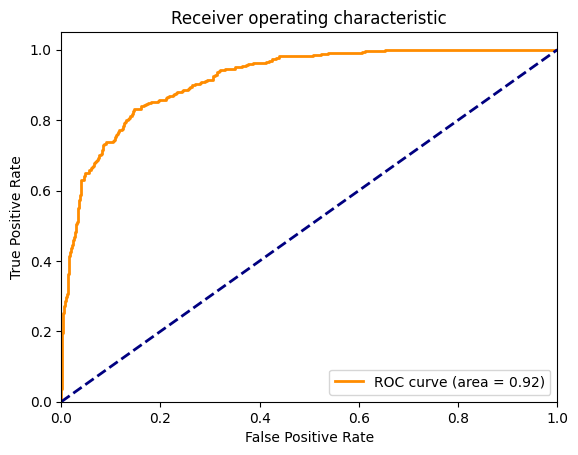

In [63]:
plot_roc_curve(y_test2, y_pred2)

5️⃣1️⃣ Walidacja krzyzowa 

In [64]:
crossVAL(model2, X_train2, y_train2, 10)

,fold,train_score,test_score,score_diff
0,1,92.951461,92.724604,0.226857
1,2,92.950659,92.513212,0.437447
2,3,92.994596,91.826189,1.168407
3,4,92.929383,92.436876,0.492507
4,5,92.981208,92.189349,0.791859
5,6,92.869894,93.147929,-0.278035
6,7,92.895884,92.467456,0.428428
7,8,93.011712,91.248521,1.763192
8,9,92.939420,92.390533,0.548887
9,10,92.857881,93.159763,-0.301882


5️⃣2️⃣ Model under i over sampling 

5️⃣3️⃣ Podział na zror treningowy i testowy

In [65]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

5️⃣4️⃣ Kombinacja Over i Under sampling

In [66]:
X_train3, y_train3 = smt.fit_resample(X_train3,y_train3)

5️⃣5️⃣ Skalowanie danych

In [67]:
X_train3 = scaler.fit_transform(X_train3)
X_test3 = scaler.transform(X_test3)

5️⃣6️⃣ Model z usuniętymi i dodanymi danymi

In [68]:
model3 = reg.fit(X_train3, y_train3)

5️⃣7️⃣ Dokładność modelu

In [69]:
score3=model3.score(X_test3,y_test3)
print("Accuracy: %.2f%%" % (score3 * 100))

Accuracy: 88.85%


In [70]:
y_pred3 = model3.predict_proba(X_test3)[:,1]

5️⃣8️⃣ Raport wyników

In [71]:
print(classification_report(y_test3, model3.predict(X_test3)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1701
           1       0.66      0.63      0.64       325

    accuracy                           0.89      2026
   macro avg       0.79      0.78      0.79      2026
weighted avg       0.89      0.89      0.89      2026



5️⃣9️⃣ Krzywa ROC

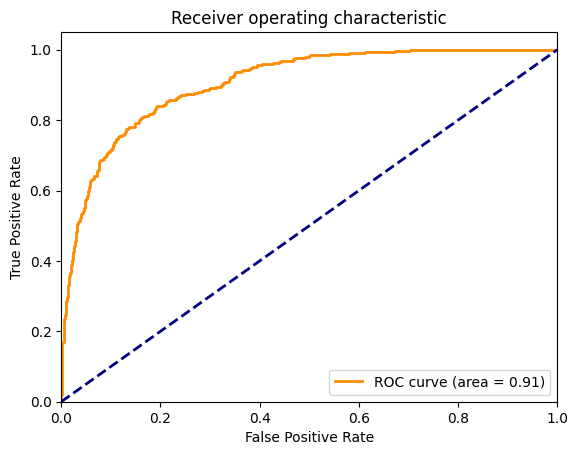

In [72]:
roc3 = plot_roc_curve(y_test3, y_pred3)

6️⃣0️⃣ Walidacja krzyzowa

In [73]:
crossVAL(model3, X_train3, y_train3, 10)

,fold,train_score,test_score,score_diff
0,1,97.761816,97.886581,-0.124766
1,2,97.799773,97.542979,0.256794
2,3,97.742439,98.097006,-0.354567
3,4,97.808033,97.483840,0.324193
4,5,97.850547,97.113189,0.737357
5,6,97.759872,97.938385,-0.178514
6,7,97.732192,98.163251,-0.431059
7,8,97.756535,97.977582,-0.221047
8,9,97.849191,97.086371,0.762821
9,10,97.755160,97.919131,-0.163971


6️⃣1️⃣ Model z wagami

6️⃣2️⃣ Przypisanie wag

In [74]:
weights = {0: 2, 1: 8}

In [75]:
reg2 = LogisticRegression(class_weight=weights)

6️⃣3️⃣ podział zbiorow na treningowy i testowy

In [76]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

6️⃣4️⃣ Skalowanie danych

In [77]:
X_train4 = scaler.fit_transform(X_train4)
X_test4 = scaler.transform(X_test4)

6️⃣5️⃣ Model dla celu z wagami

In [78]:
model4 = reg2.fit(X_train4, y_train4)

6️⃣6️⃣ Dokładnośc modelu

In [79]:
score4=model4.score(X_test4,y_test4)
print("Accuracy: %.2f%%" % (score4 * 100))

Accuracy: 86.67%


In [80]:
y_pred4 = model4.predict_proba(X_test4)[:,1]

6️⃣7️⃣ Raport wyników

In [81]:
print(classification_report(y_test4, model4.predict(X_test4)))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92      1701
           1       0.56      0.78      0.65       325

    accuracy                           0.87      2026
   macro avg       0.76      0.83      0.78      2026
weighted avg       0.89      0.87      0.87      2026



6️⃣8️⃣ Krzywa ROC

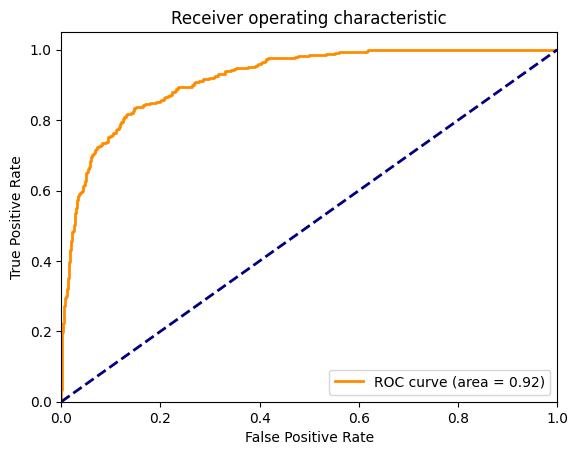

In [82]:
roc4 = plot_roc_curve(y_test4, y_pred4)

6️⃣9️⃣ Walidacja krzyzowa

In [83]:
crossVAL(model4, X_train4, y_train4, 10)

,fold,train_score,test_score,score_diff
0,1,93.012650,91.791648,1.221002
1,2,92.832053,93.347285,-0.515232
2,3,92.751554,94.088235,-1.336681
3,4,92.819030,93.561086,-0.742056
4,5,92.913989,92.535068,0.378921
5,6,92.931824,92.489819,0.442005
6,7,93.097536,90.941176,2.156359
7,8,93.111062,90.727376,2.383686
8,9,92.753422,93.973982,-1.220560
9,10,92.939879,92.385524,0.554354


7️⃣0️⃣ Porównanie wyników 4 modeli na postawie wykresu ROC

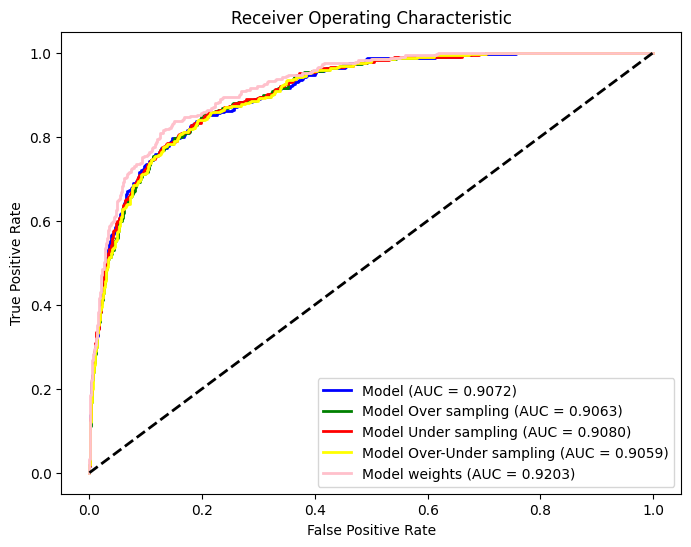

In [84]:
models = [(modelx, X_testx, y_testx),(model1, X_test1, y_test1), (model2, X_test2, y_test2), (model3, X_test3, y_test3), (model4, X_test4, y_test4)]
labels = ['Model','Model Over sampling', 'Model Under sampling', 'Model Over-Under sampling', 'Model weights']
colors = ['blue', 'green', 'red', 'yellow', 'pink']
fpr_list = []
tpr_list = []
roc_auc_list = []

for i, (model, X_test, y_test) in enumerate(models):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)

plt.figure(figsize=(8,6))
for i in range(len(models)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=2,
             label=labels[i]+' (AUC = %0.4f)' % roc_auc_list[i])

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
